## **4.1 Carga del modelo y datos test**

In [2]:
import joblib

# Cargamos el modelo

sentiment_model = joblib.load('/content/drive/MyDrive/NLP/sentiment_analysis_model.pkl')

In [7]:
# Cargamos el Vectorizer

vectorizer = joblib.load('/content/drive/MyDrive/NLP/vectorizer.pkl')

In [8]:
# Cargamos los datos para hacer las predictions y calcular las métricas

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

test_path = '/content/drive/MyDrive/NLP/test_data.csv'

test_data = pd.read_csv(test_path)

X_test = test_data['processed_reviews']
y_test = test_data['sentiment']

X_test_bow = vectorizer.transform(X_test)

print(X_test.head())
print(y_test.head())



0                                      taste bit burnt
1    item good rubbery tough lacking flavor sorry s...
2    cracker healthy taste great nine per box insan...
3    company claim weak flavor due natural ingredie...
4    happy plant look healthy braid nice although f...
Name: processed_reviews, dtype: object
0    0
1    0
2    0
3    0
4    1
Name: sentiment, dtype: int64


## **4.2 Métricas**

### **4.2.1 Accuracy, Recall y F1-Score**

In [16]:
from sklearn.metrics import classification_report

y_pred = sentiment_model.predict(X_test_bow)

report = classification_report(y_test, y_pred)

print("Reporte del modelo:")
print(report)

Reporte del modelo:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      4829
           1       0.79      0.73      0.76      3314

    accuracy                           0.81      8143
   macro avg       0.81      0.80      0.80      8143
weighted avg       0.81      0.81      0.81      8143



### **4.2.2 Matriz de confusión**

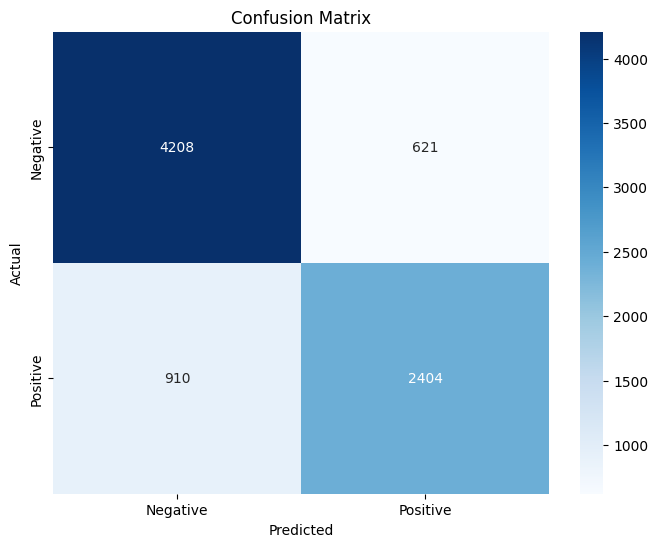

In [14]:
# Vamos a crear la matriz de confusión. Le agregaremos un heatmap de seaborn para ver de forma más gráfica el nivel de acierto y error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Según la matriz de confusión, vemos que porcentualmente, hay mayor error en los falsos positivos que en los falsos negativos, sin embargo, la diferencia es pequeña. En todo caso, deberíamos continuar mejorando el modelo para poder reducir más los errores

### **4.2.3 Curva ROC y AUC**

Área bajo la curva (AUC): 0.8828871359455353


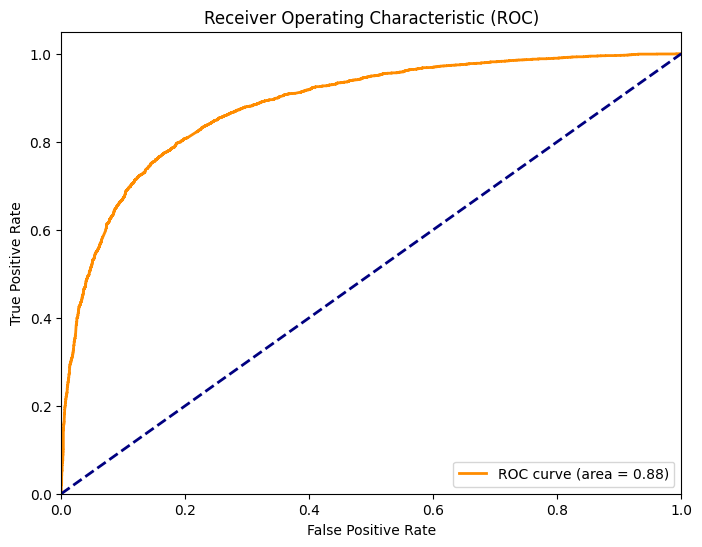

In [20]:
from sklearn.metrics import roc_curve, auc

y_scores = sentiment_model.predict_proba(X_test_bow)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = auc(fpr, tpr)

print("Área bajo la curva (AUC):", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

El resultado obtenido al analizar el AUC, nos indica que si bien el modelo es bastante mejorable, los resultados obtenidos no son malos, contando con que se trata de una primera iteración de este proyecto.

# **4.3 Conclusiones**

Como **conclusión** a este trabajo, se podrían observar varias cosas.

**En primer lugar**, se podría decir que la clave en cualquier modelo de aprendizaje automático está en la fase de preprocesado y preparación de los datos, así como en tener un dataset de la mayor calidad posible (lo cual no suele ser habitual). Por ello, es fundamental profundizar y adquirir un amplio manejo de esta parte del trabajo, ya que sin ello, dificilmente podremos alcanzar unos buenos resultados aunque el modelado sea bueno.

**En segundo lugar**, también queda patente que una buena arquitectura puede marcar la diferencia en los resultados, partiendo de unos datos de calidad como comentamos en el punto anterior. Es importante conocer las arquitecturas a utilizar, además de conocer el estado del arte y los modelos preentrenados que existen en el mercado y que ofrecen los mejores resultados en tareas similares a las que queremos realizar, como punto de partida, así como ser capaces de adaptar cada modelo a las necesidades del problema que enfrentamos.

**Por último**, y a la vista del proceso de elaboración de la presente práctica, hemos podido sentar unas bases en nuestro aprendizaje de NLP, pero es imprescindible ahora comenzar a ampliar conocimientos, estudiando los modelos existentes en el estado del arte así como profundizando en las metodologías de preparación de datos. Es un proceso necesario para poder comprender en profundidad cosas que en este momento solo comprendemos de forma superficial, especialmente, tratándose de un campo como el nuestro, en continuo desarrollo y crecimiento.
